<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/Mirai__Kitsune_Network_Attack_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC

# MLP requirements 
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

# LSTM requirements 
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# evaluation metrices
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import det_curve

# representation of model layers
from keras.utils.vis_utils import plot_model

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
bin_data_total = data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/kitsume_network_attack_dataset/kitsune_binary_data_1MMirai_dataset.csv")
bin_data_total.drop(bin_data_total.columns[0],axis=1,inplace=True)
bin_data_total

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,X116,label
0,5447,10.031062,82.841651,1.275803e+01,12.691520,82.859056,1.300692e+01,25.108850,82.559322,8.670483,...,0.000000,0.000000,48.836078,82.000000,9.536743e-07,82.000000,9.094947e-13,0.000000,0.00000,0.0
1,56820,4.661257,82.000000,9.094947e-13,7.275539,82.000000,4.219601e-08,20.756844,81.999139,0.007004,...,0.000000,0.000000,63.410145,82.000000,1.907349e-06,82.000000,3.637979e-12,0.000000,0.00000,0.0
2,10176,1.849088,105.505520,3.640463e+01,3.109124,106.505513,2.079829e+02,10.152990,108.181226,1531.322588,...,0.000000,0.000000,1.000000,102.000000,0.000000e+00,102.000000,0.000000e+00,0.000000,0.00000,0.0
3,111324,7.648122,84.132883,2.957694e+01,10.285616,83.736463,2.476811e+01,20.756171,83.148884,17.144541,...,0.000000,0.000000,59.709757,82.000000,1.348699e-06,82.000000,1.818989e-12,0.000000,0.00000,0.0
4,102456,3.632766,103.989741,1.202931e+02,6.585167,102.430772,1.532841e+02,16.029761,100.823338,175.324239,...,0.000000,0.000000,91.527828,110.000000,2.336015e-06,110.000000,5.456968e-12,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,143841,16.864181,66.126353,1.847410e-01,19.700610,66.165507,2.148385e-01,25.242448,66.223456,0.282260,...,-31.062068,-0.613542,114.441000,66.759651,2.566622e+00,120.927533,2.696229e+03,-2.538811,-0.01905,1.0
7637,137541,66.255786,60.088722,1.680977e+00,101.260881,60.127773,2.366964e+00,306.425293,60.133044,2.289978,...,0.000000,0.000000,9789.582589,60.000000,3.234067e-06,60.000000,1.045919e-11,0.000000,0.00000,1.0
7638,198077,76.529166,60.028519,4.360455e-01,104.833231,60.076387,1.204671e+00,295.737980,60.148350,2.460989,...,0.000000,0.000000,23958.225618,60.000000,7.104714e-06,60.000000,5.047696e-11,0.000000,0.00000,1.0
7639,433227,59.750208,60.239516,3.575476e+00,93.397194,60.269118,4.189966e+00,305.197263,60.229675,3.491959,...,0.000000,0.000000,30737.956581,60.000000,4.623108e-06,60.000000,2.137313e-11,0.000000,0.00000,1.0


In [7]:
# distribution of label class before sampling
data_size = bin_data_total.shape[0]
# data_size
bin_data_total.label.value_counts()/data_size

1.0    0.840859
0.0    0.159141
Name: label, dtype: float64

In [8]:
model_name_suffix = "_kitsune_Mirai"

In [9]:
# numeric feature normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

numeric_cols = bin_data_total.select_dtypes(['number']).columns
numeric_cols = numeric_cols.drop('label')
flag = 0
scaler = None
if flag:
  # using standard scaler for normalizing
  scaler = StandardScaler()
else:
  # using minmax scaler for normalizing
  # to avoid negative values after scaling
  scaler = MinMaxScaler()

def normalization_train(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.fit_transform(arr.reshape(len(arr),1))
  return df

def normalization_test(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.transform(arr.reshape(len(arr),1))
  return df

# numeric_cols

In [10]:
# sampling data taking only 50% of the data
# bin_data = bin_data_total.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.5))
bin_data = bin_data_total
bin_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,X116,label
0,5447,10.031062,82.841651,1.275803e+01,12.691520,82.859056,1.300692e+01,25.108850,82.559322,8.670483,...,0.000000,0.000000,48.836078,82.000000,9.536743e-07,82.000000,9.094947e-13,0.000000,0.00000,0.0
1,56820,4.661257,82.000000,9.094947e-13,7.275539,82.000000,4.219601e-08,20.756844,81.999139,0.007004,...,0.000000,0.000000,63.410145,82.000000,1.907349e-06,82.000000,3.637979e-12,0.000000,0.00000,0.0
2,10176,1.849088,105.505520,3.640463e+01,3.109124,106.505513,2.079829e+02,10.152990,108.181226,1531.322588,...,0.000000,0.000000,1.000000,102.000000,0.000000e+00,102.000000,0.000000e+00,0.000000,0.00000,0.0
3,111324,7.648122,84.132883,2.957694e+01,10.285616,83.736463,2.476811e+01,20.756171,83.148884,17.144541,...,0.000000,0.000000,59.709757,82.000000,1.348699e-06,82.000000,1.818989e-12,0.000000,0.00000,0.0
4,102456,3.632766,103.989741,1.202931e+02,6.585167,102.430772,1.532841e+02,16.029761,100.823338,175.324239,...,0.000000,0.000000,91.527828,110.000000,2.336015e-06,110.000000,5.456968e-12,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,143841,16.864181,66.126353,1.847410e-01,19.700610,66.165507,2.148385e-01,25.242448,66.223456,0.282260,...,-31.062068,-0.613542,114.441000,66.759651,2.566622e+00,120.927533,2.696229e+03,-2.538811,-0.01905,1.0
7637,137541,66.255786,60.088722,1.680977e+00,101.260881,60.127773,2.366964e+00,306.425293,60.133044,2.289978,...,0.000000,0.000000,9789.582589,60.000000,3.234067e-06,60.000000,1.045919e-11,0.000000,0.00000,1.0
7638,198077,76.529166,60.028519,4.360455e-01,104.833231,60.076387,1.204671e+00,295.737980,60.148350,2.460989,...,0.000000,0.000000,23958.225618,60.000000,7.104714e-06,60.000000,5.047696e-11,0.000000,0.00000,1.0
7639,433227,59.750208,60.239516,3.575476e+00,93.397194,60.269118,4.189966e+00,305.197263,60.229675,3.491959,...,0.000000,0.000000,30737.956581,60.000000,4.623108e-06,60.000000,2.137313e-11,0.000000,0.00000,1.0


In [11]:
number_of_cols = bin_data.shape[1]

In [12]:
# distribution of label class after sampling
data_size = bin_data.shape[0]
bin_data.label.value_counts()/data_size

1.0    0.840859
0.0    0.159141
Name: label, dtype: float64

In [13]:
model_selection = {
    0 : "ALL",
    2 : "MLP",
    3 : "LSTM",
    4 : "AE"
}
model_flag = 0
svm_enable = 1

In [14]:
X = bin_data.iloc[:,0:number_of_cols] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['label'] # target attribute

In [15]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [16]:
# calling the normalization() function
X_train = normalization_train(X_train,numeric_cols)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,X116,label
2764,0.385926,0.776557,0.024676,0.000013,0.771894,0.029832,0.000030,0.828615,0.034555,0.000050,...,0.623237,0.699719,0.983804,0.014913,2.179433e-07,1.776357e-15,1.872132e-14,0.302063,0.501826,1.0
1323,0.417876,0.812091,0.024654,0.000008,0.842496,0.029834,0.000026,0.903586,0.034708,0.000063,...,0.623237,0.699719,0.992037,0.014913,2.376671e-07,1.665335e-15,2.226319e-14,0.302063,0.501826,1.0
5663,0.348577,0.737139,0.024678,0.000009,0.741384,0.029827,0.000020,0.799046,0.034519,0.000032,...,0.623237,0.699719,0.965116,0.014913,1.615649e-07,2.359224e-15,1.028829e-14,0.302063,0.501826,1.0
1859,0.613453,0.406594,0.025610,0.000154,0.474723,0.030741,0.000165,0.701109,0.035035,0.000113,...,0.623237,0.699719,0.994456,0.014913,2.358597e-07,1.054712e-15,2.192587e-14,0.302063,0.501826,1.0
5400,0.504674,0.012139,0.131969,0.003656,0.013580,0.146635,0.005289,0.020653,0.169513,0.009923,...,0.623237,0.699719,0.000000,0.144159,0.000000e+00,2.482554e-01,0.000000e+00,0.302063,0.501826,1.0


In [17]:
# calling the normalization() function
X_test = normalization_test(X_test,numeric_cols)
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,X116,label
683,2.789841e+05,11.534336,181.071288,153.987747,13.202505,175.518903,222.497167,19.872858,166.662184,276.386859,...,0.501826,0.501826,362.225875,189.424560,0.501832,189.424560,0.501826,0.501826,0.501826,0.0
6020,3.854674e+05,280.965066,138.779747,1.093010,387.856273,138.815780,1.650812,884.819309,138.905195,3.150635,...,0.501826,0.501826,47406.421187,138.737973,0.501839,138.737973,0.501826,0.501826,0.501826,1.0
2457,4.007171e+05,234.378358,138.792602,1.529917,323.277827,138.859834,2.771476,789.295198,138.954834,4.348611,...,0.501826,0.501826,51268.919325,138.737973,0.501838,138.737973,0.501826,0.501826,0.501826,1.0
2598,1.677141e+06,195.454425,138.884584,2.723993,278.779507,138.952208,3.715689,752.073488,138.976741,4.042384,...,0.501826,0.501826,70846.864941,138.737973,0.501833,138.737973,0.501826,0.501826,0.501826,1.0
7299,1.714424e+06,118.536261,138.809278,1.498442,196.263919,138.853517,2.128053,662.350629,138.932966,3.389159,...,0.501826,0.501826,70743.819510,138.737973,0.501844,138.737973,0.501826,0.501826,0.501826,1.0


## **Linear Support Vector Machine Classifier (Binary Classification) **
to enable make the svm_enable = 1 in the above cell

In [18]:
if svm_enable:
  # using kernel as linear 
  lsvm = SVC(kernel='linear',gamma='auto') 
  lsvm.fit(X_train,y_train) # training model on training dataset

In [19]:
if svm_enable:
  pkl_filename = "/content/drive/MyDrive/Colab_Notebooks/Models/lsvm_binary"+model_name_suffix+".pkl"
  if (not path.isfile(pkl_filename)):
    # saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
      pickle.dump(lsvm, file)
    print("Saved model to disk")
    # loading the trained model from disk
    with open(pkl_filename, 'rb') as file:
      lsvm = pickle.load(file)
    print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [20]:
if svm_enable:
  y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
  ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
  print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  82.73155416012558


In [21]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# cm = confusion_matrix(y_test, y_pred, labels=lsvm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=lsvm.classes_)
# disp.plot()

# plt.show()

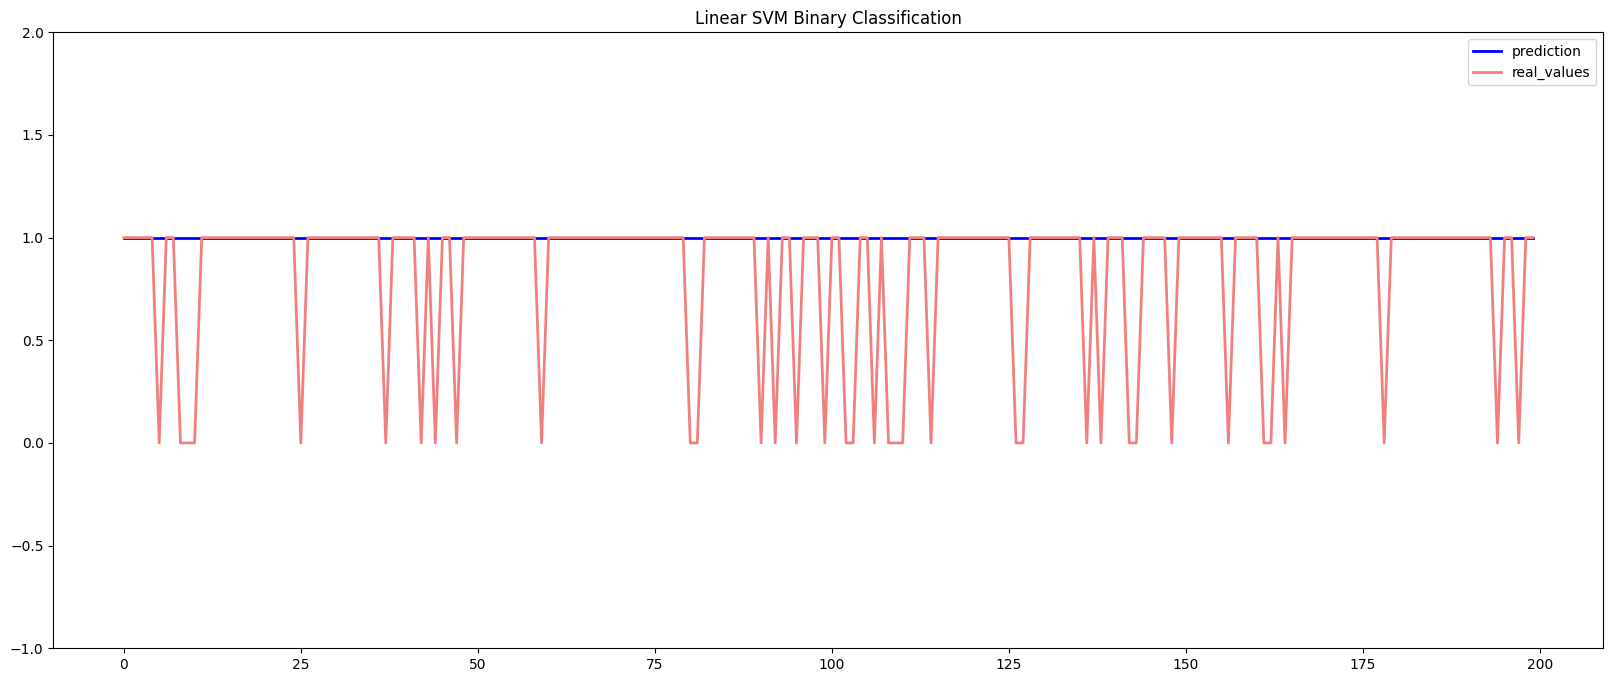

In [22]:
if svm_enable:
  plt.figure(figsize=(20,8))
  plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
  plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
  plt.legend(loc="best")
  plt.ylim((-1,2))
  plt.title("Linear SVM Binary Classification")
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lsvm_real_pred_bin.png')
  plt.show()

In [23]:
if svm_enable:
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred, target_names=target_names))
  fpr, fnr, thresholds = det_curve(y_test, y_pred)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       330
     class 1       0.83      1.00      0.91      1581

    accuracy                           0.83      1911
   macro avg       0.41      0.50      0.45      1911
weighted avg       0.68      0.83      0.75      1911

False Positive Rate -  [1.]
False Negative Rate -  [0.]
Thresholds -  [1.]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


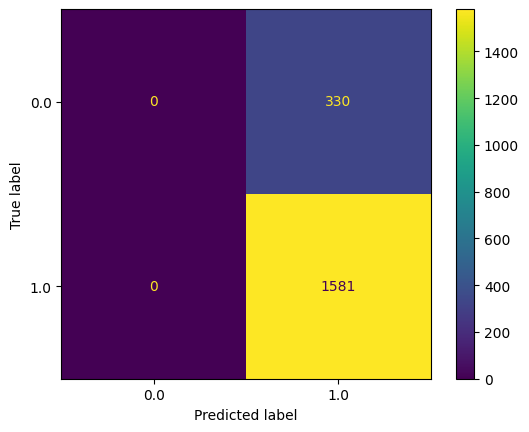

In [24]:
if svm_enable:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  clf = lsvm
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
  disp.plot()

  plt.show()

## **Multi Layer Perceptron Classifier (Binary Classification)**

In [25]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  mlp = Sequential() # creating model

  # adding input layer and first layer with 50 neurons
  mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
  # output layer with sigmoid activation
  mlp.add(Dense(units=1,activation='sigmoid'))

In [26]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # summary of model layers
  mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                5900      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,951
Trainable params: 5,951
Non-trainable params: 0
_________________________________________________________________


In [28]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # training the model on training dataset
  history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.6512 - accuracy: 0.7288 - val_loss: 0.6172 - val_accuracy: 0.7949
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 0.6192 - accuracy: 0.7877 - val_loss: 0.5872 - val_accuracy: 0.8482
Epoch 3/100
1/1 [==============================] - 0s 40ms/step - loss: 0.5895 - accuracy: 0.8364 - val_loss: 0.5591 - val_accuracy: 0.8551
Epoch 4/100
1/1 [==============================] - 0s 42ms/step - loss: 0.5616 - accuracy: 0.8412 - val_loss: 0.5322 - val_accuracy: 0.8551
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 0.5349 - accuracy: 0.8416 - val_loss: 0.5063 - val_accuracy: 0.8551
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 0.5092 - accuracy: 0.8421 - val_loss: 0.4818 - val_accuracy: 0.8551
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 0.4849 - accuracy: 0.8421 - val_loss: 0.4585 - val_accuracy: 0.8551
Epoch 8/100
1/1 [=====

In [29]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/mlp_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/mlp_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    mlp_json = mlp.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(mlp_json)

    # serialize weights to HDF5
    mlp.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    mlp = model_from_json(loaded_model_json)

    # load weights into new model
    mlp.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [30]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # predicting target attribute on testing dataset
  test_results = mlp.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

60/60 [==============================] - 1s 4ms/step - loss: 205442093416448.0000 - accuracy: 0.2402
Test results - Loss: 205442093416448.0 - Accuracy: 24.01883900165558


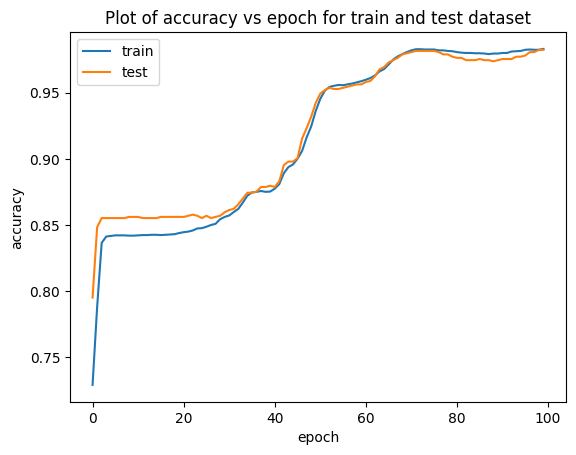

In [32]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":  
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_accuracy.png')
  plt.show()

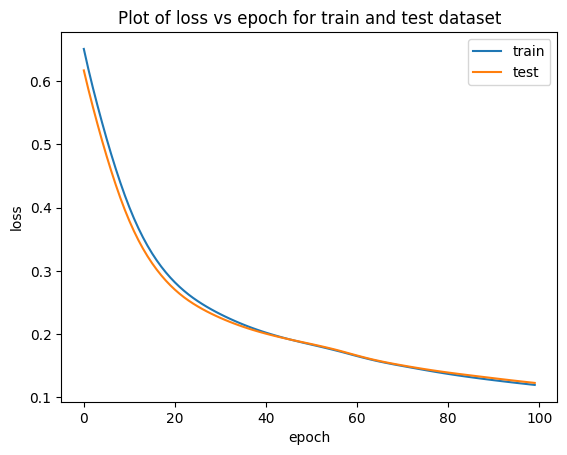

In [33]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Plot of loss vs epoch for train and test dataset')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_loss.png')
  plt.show()

In [34]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # representation of model layers
  from keras.utils.vis_utils import plot_model
  plot_model(mlp, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary.png', show_shapes=True,)

In [35]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_pred = mlp.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = auc(fpr, tpr)

60/60 [==============================] - 0s 4ms/step


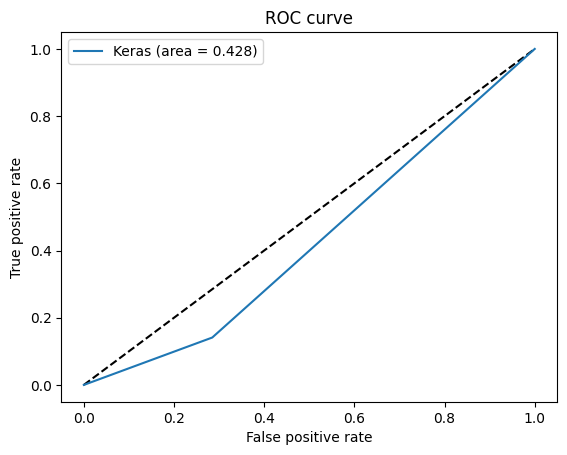

In [36]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_roc.png')
  plt.show()

In [37]:
# real_data_kdd = bin_data.copy()

# # Names of the columns that are discrete
# cat_cols = real_data_kdd.select_dtypes(['object']).columns
# # cat_cols
# test_data = real_data_kdd.iloc[:999]

# corr= test_data.corr()
# corr_y = abs(corr['label'])
# highest_corr = corr_y
# highest_corr.sort_values(ascending=True)

In [38]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_classes = (mlp.predict(X_test)>0.5).astype('int32')

60/60 [==============================] - 0s 2ms/step


In [39]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.14104996837444655
F1 Score -  0.2349841938883035
Precision Score -  0.7034700315457413
False Positive Rate -  [1.         0.28484848]
False Negative Rate -  [0.         0.85895003]
Thresholds -  [0 1]


              precision    recall  f1-score   support

           0       0.15      0.72      0.25       330
           1       0.70      0.14      0.23      1581

    accuracy                           0.24      1911
   macro avg       0.43      0.43      0.24      1911
weighted avg       0.61      0.24      0.24      1911



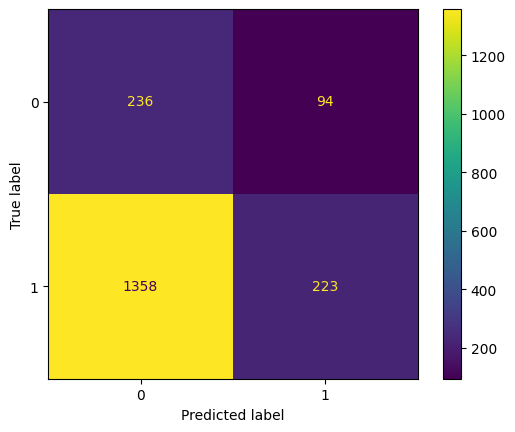

In [40]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

# **Correlation** Matrix of Features

In [41]:
corr= bin_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

X65      0.301125
X61      0.356556
X111     0.357373
X33      0.357905
X40      0.358773
X83      0.359304
X90      0.359469
X97      0.359704
X104     0.360035
X47      0.360466
X54      0.361992
X55      0.375927
X113     0.388689
X106     0.391058
X85      0.396061
X92      0.396165
X99      0.396202
X3       0.409439
X18      0.409439
X21      0.430490
X6       0.430490
X35      0.436232
X42      0.437304
X49      0.440699
X63      0.440790
X56      0.445148
X24      0.481127
X9       0.481127
X12      0.549301
X27      0.549301
X82      0.554207
X15      0.555264
X30      0.555264
X17      0.574194
X2       0.574194
X89      0.592376
X20      0.618340
X5       0.618340
X1       0.632051
X110     0.651532
X96      0.667468
X103     0.678989
X14      0.686500
X29      0.686500
X23      0.704743
X8       0.704743
X26      0.718131
X11      0.718131
label    1.000000
Name: label, dtype: float64

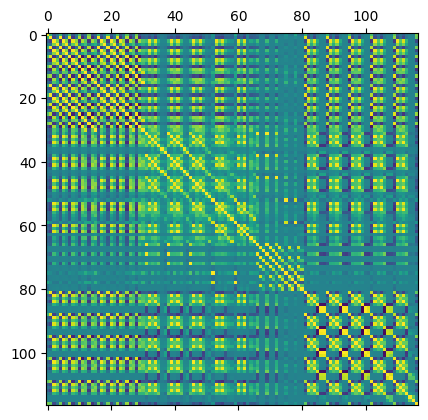

In [42]:
plt.matshow(corr)
plt.show()

## **LSTM Classifier**

In [43]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train.shape   #(18896,)
X_train.shape

(5730, 117)

In [44]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [45]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(5730, 1, 117)

In [46]:
x_train.shape[2]

117

In [47]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
x_test.shape

(1911, 1, 117)

In [48]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  lst = Sequential()
  # input layer and LSTM layer with 50 neurons
  input_features = x_train.shape[2]
  lst.add(LSTM(50,input_dim=input_features))

  # outpute layer with sigmoid activation
  lst.add(Dense(1,activation='sigmoid'))

In [49]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # summary of model layers
  lst.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                33600     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33,651
Trainable params: 33,651
Non-trainable params: 0
_________________________________________________________________


In [51]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # training the model on training dataset
  history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.7169 - accuracy: 0.1573 - val_loss: 0.6932 - val_accuracy: 0.5236
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6926 - accuracy: 0.5572 - val_loss: 0.6695 - val_accuracy: 0.8403
Epoch 3/100
1/1 [==============================] - 0s 40ms/step - loss: 0.6693 - accuracy: 0.8416 - val_loss: 0.6469 - val_accuracy: 0.8534
Epoch 4/100
1/1 [==============================] - 0s 55ms/step - loss: 0.6470 - accuracy: 0.8445 - val_loss: 0.6252 - val_accuracy: 0.8551
Epoch 5/100
1/1 [==============================] - 0s 56ms/step - loss: 0.6257 - accuracy: 0.8432 - val_loss: 0.6044 - val_accuracy: 0.8551
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 0.6053 - accuracy: 0.8429 - val_loss: 0.5844 - val_accuracy: 0.8551
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 0.5857 - accuracy: 0.8429 - val_loss: 0.5653 - val_accuracy: 0.8551
Epoch 8/100
1/1 [=====

In [52]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/lst_binary_kitsune'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/lst_binary_kitsune'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    lst_json = lst.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(lst_json)

    # serialize weights to HDF5
    lst.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lst = model_from_json(loaded_model_json)

    # load weights into new model
    lst.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [53]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Loaded model from disk


In [54]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # predicting target attribute on testing dataset
  test_results = lst.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

60/60 [==============================] - 1s 3ms/step - loss: 0.7732 - accuracy: 0.2439
Test results - Loss: 0.7731915712356567 - Accuracy: 24.38513934612274%


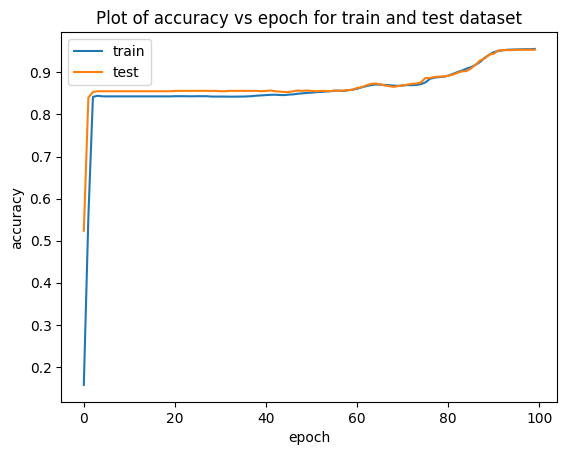

In [56]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_accuracy.png')
  plt.show()

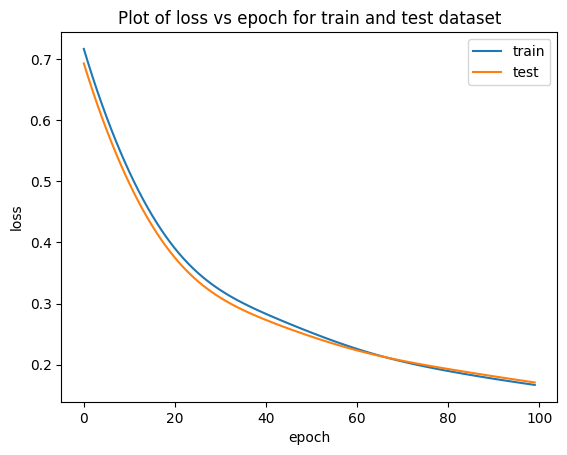

In [57]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_loss.png')
  plt.show()

In [58]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # representation of model layers
  plot_model(lst, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary.png', show_shapes=True,)

In [59]:
y_test = np.array(y_test)
y_test.shape

(1911,)

In [60]:
type(y_test)

numpy.ndarray

In [61]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  y_classes = (lst.predict(x_test)>0.5).astype('int32')

60/60 [==============================] - 0s 2ms/step


In [62]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.14358001265022138
F1 Score -  0.239073196419168
Precision Score -  0.7138364779874213
False Positive Rate -  [1.         0.27575758]
False Negative Rate -  [0.         0.85641999]
Thresholds -  [0 1]


              precision    recall  f1-score   support

           0       0.15      0.72      0.25       330
           1       0.71      0.14      0.24      1581

    accuracy                           0.24      1911
   macro avg       0.43      0.43      0.24      1911
weighted avg       0.62      0.24      0.24      1911



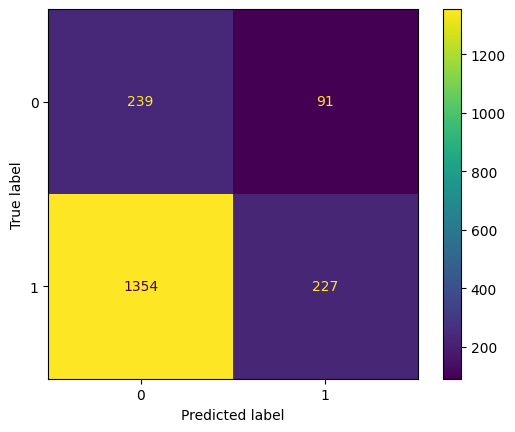

In [63]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

## **Auto Encoder**

In [64]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # splitting the dataset 75% for training and 25% testing
  X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [65]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_train = X_train.drop(['label'],axis=1) 

  y_test = X_test['label'] # target attribute

  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_test = X_test.drop(['label'],axis=1)
  # calling the normalization() function
  X_train = normalization_train(X_train,numeric_cols)
  X_test = normalization_test(X_test,numeric_cols)
  X_train = X_train.values
  X_test = X_test.values
  y_test = y_test.values

In [66]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  input_dim = X_train.shape[1]
  encoding_dim = 50

  #input layer
  input_layer = Input(shape=(input_dim, ))
  #encoding layer with 50 neurons
  encoder = Dense(encoding_dim, activation="relu")(input_layer)           
  #decoding and output layer
  output_layer = Dense(input_dim, activation='softmax')(encoder)

In [67]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  autoencoder = Model(inputs=input_layer, outputs=output_layer)

  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [68]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_3 (Dense)             (None, 50)                5850      
                                                                 
 dense_4 (Dense)             (None, 116)               5916      
                                                                 
Total params: 11,766
Trainable params: 11,766
Non-trainable params: 0
_________________________________________________________________


In [69]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
12/12 [==============================] - 1s 28ms/step - loss: 0.1364 - accuracy: 0.0000e+00 - val_loss: 45974462436475541976669313040384.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.1349 - accuracy: 1.7452e-04 - val_loss: 45974462436475541976669313040384.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.1323 - accuracy: 1.7452e-04 - val_loss: 45974462436475541976669313040384.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1295 - accuracy: 0.0000e+00 - val_loss: 45974462436475541976669313040384.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1276 - accuracy: 0.0000e+00 - val_loss: 45974462436475541976669313040384.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 0.1266 - accuracy: 0.000

In [70]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    autoencoder_json = autoencoder.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(autoencoder_json)

    # serialize weights to HDF5
    autoencoder.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    autoencoder = model_from_json(loaded_model_json)

    # load weights into new model
    autoencoder.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [71]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [72]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

60/60 [==============================] - 0s 2ms/step - loss: 45974457600772263518152614215680.0000 - accuracy: 0.0000e+00
Test results - Loss: 4.597445760077226e+31 - Accuracy: 0.0%


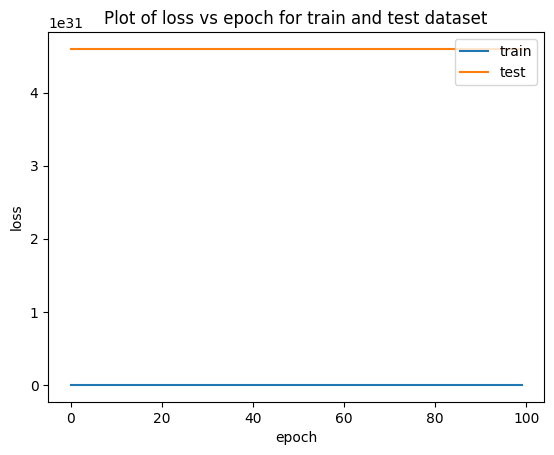

In [73]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_loss.png')
  plt.show()

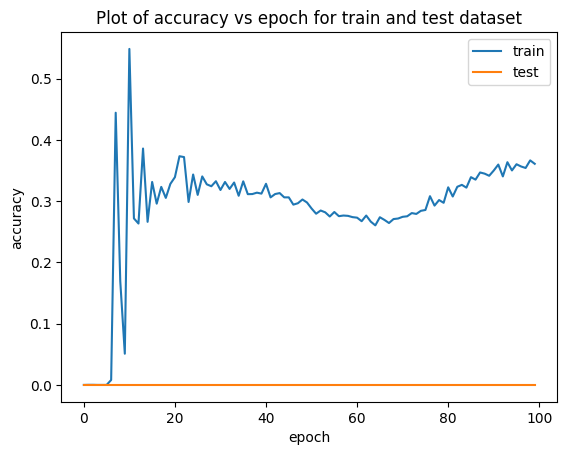

In [74]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_accuracy.png')
  plt.show()

In [75]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary.png', show_shapes=True,)

In [76]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # calculating reconstruction error 
  predictions = autoencoder.predict(X_test)

60/60 [==============================] - 0s 1ms/step


In [77]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                           'true_class': y_test})

In [78]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  error_df.describe()
  print(predictions.shape)

(1911, 116)


## **AE Classifier**

In [79]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  i_dim = predictions.shape[1]

  #input layer
  i_layer = Input(shape=(i_dim, ))
  #hidden layer with 50 neurons
  fvector = Dense(50, activation="sigmoid")(i_layer)                    
  #doutput layer
  o_layer = Dense(1, activation='sigmoid')(fvector)

In [80]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  ae_classifier = Model(inputs=i_layer, outputs=o_layer)

  # defining loss function, optimizer, metrics and then compiling model
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_5 (Dense)             (None, 50)                5850      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [82]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
4/4 [==============================] - 2s 86ms/step - loss: 0.4605 - accuracy: 0.8285 - val_loss: 0.4698 - val_accuracy: 0.8225
Epoch 2/300
4/4 [==============================] - 0s 23ms/step - loss: 0.4589 - accuracy: 0.8285 - val_loss: 0.4684 - val_accuracy: 0.8225
Epoch 3/300
4/4 [==============================] - 0s 17ms/step - loss: 0.4583 - accuracy: 0.8285 - val_loss: 0.4679 - val_accuracy: 0.8225
Epoch 4/300
4/4 [==============================] - 0s 23ms/step - loss: 0.4583 - accuracy: 0.8285 - val_loss: 0.4678 - val_accuracy: 0.8225
Epoch 5/300
4/4 [==============================] - 0s 24ms/step - loss: 0.4582 - accuracy: 0.8285 - val_loss: 0.4678 - val_accuracy: 0.8225
Epoch 6/300
4/4 [==============================] - 0s 23ms/step - loss: 0.4581 - accuracy: 0.8285 - val_loss: 0.4679 - val_accuracy: 0.8225
Epoch 7/300
4/4 [==============================] - 0s 23ms/step - loss: 0.4581 - accuracy: 0.8285 - val_loss: 0.4679 - val_accuracy: 0.8225
Epoch 8/300
4/4 [===

In [83]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_classifier_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_classifier_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    ae_classifier_json = ae_classifier.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(ae_classifier_json)

    # serialize weights to HDF5
    ae_classifier.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    ae_classifier = model_from_json(loaded_model_json)

    # load weights into new model
    ae_classifier.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [84]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [85]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

60/60 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8273
Test results - Loss: 0.47930851578712463 - Accuracy: 82.73155689239502%


In [86]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary.png', show_shapes=True)

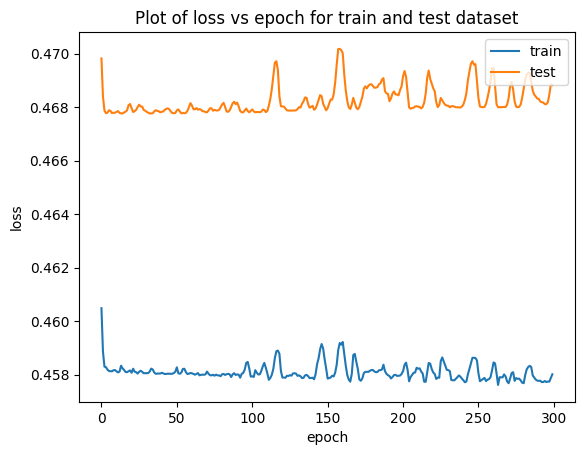

In [87]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(his['loss'])
  plt.plot(his['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_loss.png')
  plt.show()

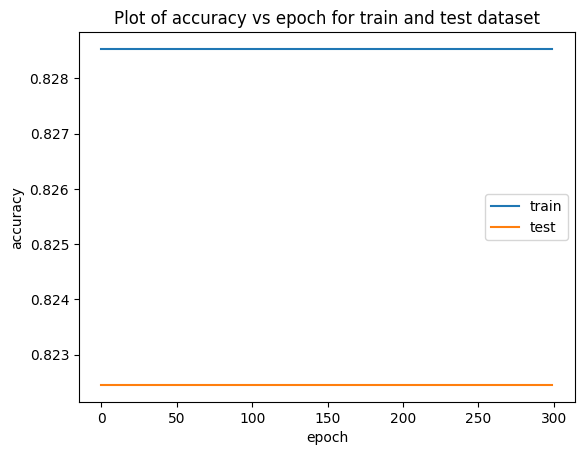

In [88]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(his['accuracy'])
  plt.plot(his['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_accuracy.png')
  plt.show()

In [89]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  y_pred = ae_classifier.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #auc = auc(fpr, tpr)

60/60 [==============================] - 0s 1ms/step


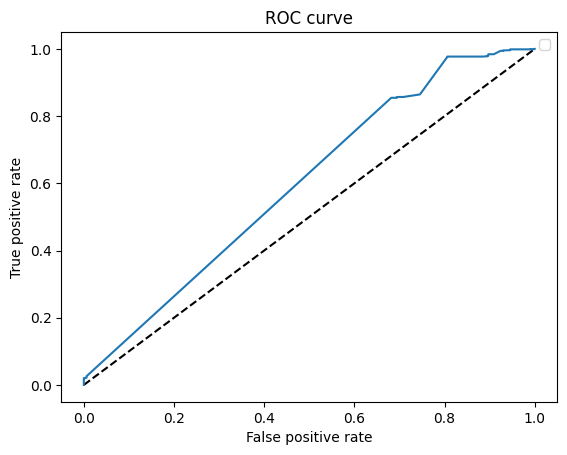

In [90]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  plt.plot([0, 1], [0, 1], 'k--')
  #plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.plot(fpr, tpr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_roc.png')
  plt.show()

In [91]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  pred = ae_classifier.predict(X_test)
  y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

60/60 [==============================] - 0s 2ms/step


In [92]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  1.0
F1 Score -  0.9054982817869416
Precision Score -  0.8273155416012559
False Positive Rate -  [1.]
False Negative Rate -  [0.]
Thresholds -  [1]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       330
           1       0.83      1.00      0.91      1581

    accuracy                           0.83      1911
   macro avg       0.41      0.50      0.45      1911
weighted avg       0.68      0.83      0.75      1911



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


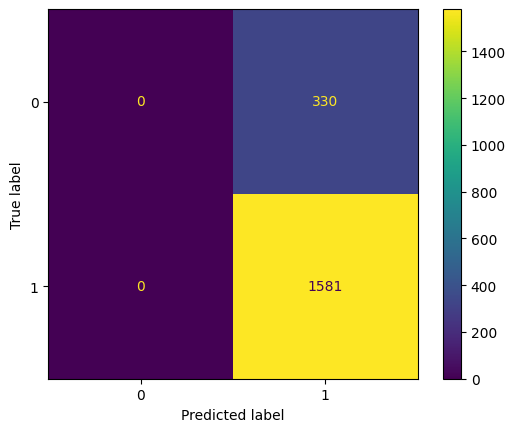

In [93]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()